Sales Summary:
  product  total_quantity  revenue
0   Apple              55     66.0
1  Banana              80     40.0
2  Orange              60     48.0


<Figure size 800x600 with 0 Axes>

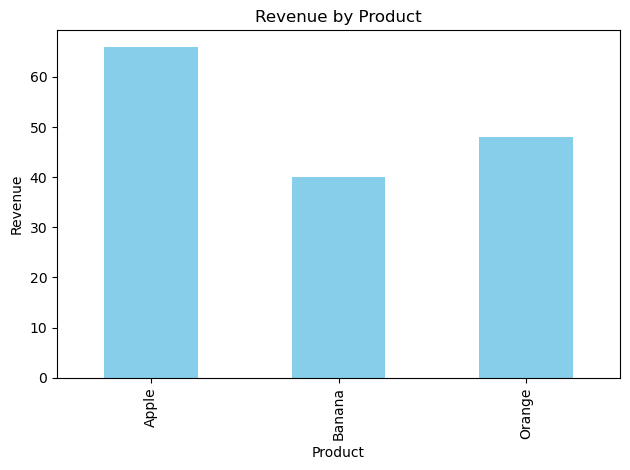

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Creating an SQLite DB and a sales table
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Interting sales data
sales_data = [
    ('Apple', 30, 1.2),
    ('Banana', 50, 0.5),
    ('Orange', 20, 0.8),
    ('Apple', 25, 1.2),
    ('Banana', 30, 0.5),
    ('Orange', 40, 0.8),
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()

# Step 3: Run SQL query to get total quantity and revenue per product
query = """
SELECT product, 
       SUM(quantity) AS total_quantity, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 4: Print results
print("Sales Summary:")
print(df)

# Step 5: Plot bar chart for revenue
plt.figure(figsize=(8, 6))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()